# Geometric Analysis of Sensor Drift

## Project Introduction and Problem Description

### Project Overview

This project investigates the phenomenon of sensor drift in gas sensor arrays through the lens of **unsupervised learning**, specifically employing **Principal Component Analysis (PCA)** as the primary dimensionality reduction technique. The core challenge addresses how chemical sensor measurements, which exist in a 128-dimensional space, change their response patterns over time due to sensor aging and environmental factors—a critical problem in chemical detection systems that affects reliability and accuracy.

The project reframes the traditional calibration problem as a geometric analysis task: understanding how the low-dimensional manifold occupied by chemical signatures transforms over time in high-dimensional measurement space. By applying PCA and related techniques, we aim to identify stable subspaces that remain invariant despite temporal drift, ultimately developing methods for drift correction and improved chemical classification.

### Understanding the Gas Sensor Array: From Chemical Fingerprints to Drift Challenges
We have 16 metal oxide sensors, each with different chemical compositions that react differently to various gases. When a gas sample is introduced, all 16 sensors are exposed to it simultaneously, and their combined electrical resistance changes create a unique “fingerprint” pattern for identifying that gas. During each measurement, sensors were monitored continuously as resistance changed over time, but we don’t have access to this original time series data - instead, we have extracted features. F1_DR captures the steady-state resistance change (ΔR) in Ohms, essentially the maximum stable resistance difference reached during gas exposure compared to baseline air. F2 normalizes this resistance change (ΔR/R₀) for comparability across sensors with different baseline resistances. F3-F8 are not transformations of F1 or F2 but rather exponential moving averages calculated directly from the original time series at different time scales (α=0.001, 0.01, 0.1), capturing how fast sensors respond to gas exposure (EMAi) and how quickly they recover when gas is removed (EMAd). These temporal features encode the dynamic behavior - whether the resistance spiked quickly or rose gradually, recovered fast or lingered - information completely absent from the steady-state values. The drift problem occurs because these resistance patterns change over time as sensors age, even for the same gas at the same concentration. The unsupervised learning challenge is to discover patterns in this 128-dimensional space (16 sensors × 8 features) that remain stable enough to identify gases despite this temporal drift.​​​​​​​​​​​​​​​​

### What PCA Can Achieve for the Sensor Drift Project

PCA will decompose our 128-dimensional sensor space into principal components that capture the main patterns of variation in the data. We expect to find components that primarily separate different gas types (the chemical signal we want to preserve) and other components that primarily capture temporal drift (the aging pattern we want to understand and correct). By analyzing the loadings, we can identify which specific sensors and features contribute most to gas discrimination versus drift - potentially discovering that certain sensors remain stable discriminators while others are particularly susceptible to aging.

The practical achievements could be significant. First, we can develop a drift monitoring system where specific PCs serve as indicators for when recalibration is needed, replacing fixed maintenance schedules with data-driven decisions. Second, if drift occurs along different dimensions than gas discrimination, we can potentially correct for it by transforming measurements back toward the original calibration space without losing chemical identification accuracy. Third, by identifying which sensors remain most stable over time, we can inform future sensor array designs that prioritize these more reliable compositions.

The clustering analysis in the reduced PC space will validate whether gases remain distinguishable despite drift. If we can show that gas types still form distinct clusters even after 36 months of aging, just shifted in PC space, then we’ve proven that the chemical information persists and can be recovered. This would mean extending sensor array lifetimes significantly - instead of replacing arrays when they drift, we could apply geometric corrections based on the discovered drift patterns. Success here would be achieving at least 70% classification accuracy on old sensor data using patterns learned from new sensor data, demonstrating that the underlying chemical fingerprints remain intact despite temporal changes.​​​​​​​​​​​​​​​​

### Type of Learning and Task

**Learning Paradigm:** Unsupervised Learning

- No labeled drift patterns are provided; we discover structure from the data itself
- Focus on understanding intrinsic data geometry and temporal evolution

**Primary Algorithms:**

- **Principal Component Analysis (PCA)**: For dimensionality reduction and identifying dominant variance directions
- **Clustering algorithms** (K-means, hierarchical): For grouping chemical signatures


**Task Type:**

- **Dimensionality Reduction**: Reducing 128-dimensional sensor readings to a manageable subspace
- **Anomaly Detection**: Identifying drift patterns as deviations from expected behavior
- **Pattern Recognition**: Discovering invariant features across temporal batches

### Project Goals and Motivation

**Primary Goal:** To develop a mathematical framework for understanding and correcting sensor drift through principal component analysis, achieving at least a 30% reduction in drift-induced classification errors.

**Why This Matters:**

1. **Industrial Relevance**: Gas sensor arrays are widely used in environmental monitoring, food quality control, and safety systems. Sensor drift causes frequent recalibration needs, increasing operational costs.

2. **Scientific Innovation**: By treating drift as a geometric transformation in PC space rather than noise, we can develop more principled correction methods that preserve chemical signature integrity.

3. **Practical Impact**: A successful drift correction method would extend sensor array lifetime, reduce maintenance requirements, and improve long-term reliability of chemical detection systems.

**Specific Objectives:**

- Prove that chemical signatures occupy a low-dimensional manifold (5-8 dimensions) within the 128-dimensional measurement space
- Quantify the stability of different principal components over 36 months using global PCA
- Characterize drift as geometric transformations in PC space (centroid shifts and dispersion changes)
- Validate clustering performance across different PC subspaces despite temporal drift

### Data Source and Citation

**Dataset:** Gas Sensor Array Drift Dataset

**Source:** UCI Machine Learning Repository

**Full Citation:**
Vergara, A., Vembu, S., Ayhan, T., Ryan, M. A., Homer, M. L., & Huerta, R. (2012). *Gas Sensor Array Drift Dataset*. UCI Machine Learning Repository. https://doi.org/10.24432/C5ZS4K

**Data Description:**
The dataset contains measurements from an array of 128 metal oxide gas sensors exposed to six different gaseous substances (Ethanol, Ethylene, Ammonia, Acetaldehyde, Acetone, and Toluene) at various concentrations. Data was collected over 36 months in five distinct batches (months 1, 5, 10, 15, and 20), capturing the natural drift phenomenon as sensors age. Each measurement consists of 128 features representing individual sensor responses, with approximately 13,910 total observations across all batches.

**Data Collection Method:**
Measurements were obtained in a controlled laboratory environment using a standardized gas delivery system. Each batch represents a different time point in the sensor array's lifetime, allowing us to study temporal drift patterns systematically.

### Related Work and Novel Contributions
@vergara2012chemical introduced the Gas Sensor Array Drift Dataset and 
focused on drift compensation for supervised classification tasks, employing 
ensemble methods to maintain gas identification accuracy despite sensor aging. 
Their work, along with subsequent studies (@rodriguez2014calibration), primarily addressed drift as a challenge for 
prediction accuracy rather than investigating the geometric properties of 
drift itself.

This project diverges from existing supervised approaches by examining drift 
through an unsupervised, geometric lens. Specifically, we investigate which 
principal components of the 128-dimensional sensor space exhibit stability 
across time batches and characterize drift as manifold deformations in 
reduced-dimensional space. By computing angular distances between principal 
component vectors across different measurement campaigns, we develop stability 
rankings that identify drift-resistant subspaces—an analysis not present in 
prior work on this dataset.

## Data Loading & Initial Inspection



### Data Import Challenges

The original dataset from UCI uses LibSVM sparse format, which required careful interpretation. Initially, we misidentified feature 1 (with values around 15,000-670,000) as concentration data, when it's actually ΔR₁ - the absolute resistance change in Ohms for the first sensor. The UCI documentation clarified that this is the **original dataset version without concentration values**. All 128 features represent sensor measurements: 16 chemical sensors × 8 features each (2 steady-state + 6 transient features). Understanding this structure was crucial for proper data processing and column naming (S{sensor}_F{feature}_{type} format).

To handle this complex data conversion systematically, we created a dedicated processing script `src/sensor_drift/process_dat_to_csv.py` that converts the raw LibSVM format (.dat files) to a properly structured CSV with meaningful column names, without applying any data modifications.

### Initial Data Inspection

In this section, we'll load the gas sensor drift dataset and perform some initial inspection of the data to understand its structure, size, and key characteristics.

In [64]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data
data_path = Path("../data/processed/sensor_data.csv")
df = pd.read_csv(data_path)

# Basic Dataset Information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types distribution
print(f"\nData types distribution:")
for dtype, count in df.dtypes.value_counts().items():
    print(f"  {dtype}: {count} columns")

# Column information
print("\nColumn categories:")
sensor_cols = [col for col in df.columns if col.startswith('S')]
metadata_cols = [col for col in df.columns if col not in sensor_cols]
print(f"  Sensor features: {len(sensor_cols)} columns")
print(f"  Metadata columns: {len(metadata_cols)} columns")
print(f"  Metadata column names: {metadata_cols}")

# Display sample data
print("\nSample data (first 3 rows, selected columns):")
sample_cols = ['gas_type', 'gas_name', 'batch'] + sensor_cols[:3]
print(df[sample_cols].head(3).to_string(index=False))

DATASET OVERVIEW
Dataset shape: 13,910 rows × 131 columns

Memory usage: 14.66 MB

Data types distribution:
  float64: 128 columns
  int64: 2 columns
  object: 1 columns

Column categories:
  Sensor features: 128 columns
  Metadata columns: 3 columns
  Metadata column names: ['gas_type', 'gas_name', 'batch']

Sample data (first 3 rows, selected columns):
 gas_type gas_name  batch  S01_F1_DR  S01_F2_DR_norm  S01_F3_EMAi_001
        1  Ethanol      1 15596.1621        1.868245         2.371604
        1  Ethanol      1 26402.0704        2.532401         5.411209
        1  Ethanol      1 42103.5820        3.454189         8.198175


## Data Quality Assessment and Cleaning

Next, we'll check for potential data quality issues:

- Missing values - Identify any null or NaN entries
- Data types - Verify all sensor columns are numeric
- Duplicates - Detect repeated samples that could bias analysis
- Temporal consistency - Ensure batch labels are sequential and complete
- Value ranges - Identify impossible values (e.g., negative sensor readings)
- Sample balance - Verify adequate representation across gas types and concentrations"

In [65]:

# Store original shape for comparison
original_shape = df.shape
print(f"Original dataset: {original_shape[0]:,} rows × {original_shape[1]} columns")

# 1. Check for missing values
missing_check = df.isnull().sum()
print(f"\n1. Missing Values: {missing_check.sum()} total")

# 2. Data types check
non_numeric_sensors = [col for col in sensor_cols 
                       if not pd.api.types.is_numeric_dtype(df[col])]
print(f"2. Non-numeric Sensor Columns: ",
      f"{non_numeric_sensors if non_numeric_sensors else 'All numeric ✓'}")

# 3. Check for duplicates
duplicates = df.duplicated()
print(f"3. Duplicate Rows: {duplicates.sum()}")

# 4. Temporal consistency
batch_values = sorted(df['batch'].unique())
expected_batches = list(range(1, max(batch_values)+1))
missing_batches = set(expected_batches) - set(batch_values)
print(f"4. Temporal Consistency:")
print(f"   Batches present: {min(batch_values)}-{max(batch_values)}")
print(f"   Missing batches: {list(missing_batches) if missing_batches else 'None ✓'}")

# 5. Value ranges
sensor_data = df[sensor_cols]
print(f"5. Sensor Value Ranges:")
print(f"   Min: {sensor_data.min().min():.2f}")
print(f"   Max: {sensor_data.max().max():.2f}")
negative_sensors = (sensor_data < 0).any()
print(f"   Sensors with negative values: {negative_sensors.sum()}")

# 6. Sample balance
gas_counts = df['gas_name'].value_counts()
print(f"6. Sample Balance:")
print(f"   Gas types: {len(gas_counts)} types")
print(f"   Min samples: {gas_counts.min()}")
print(f"   Max samples: {gas_counts.max()}")
print(f"   Imbalance ratio: {gas_counts.max() / gas_counts.min():.2f}:1")


Original dataset: 13,910 rows × 131 columns

1. Missing Values: 0 total
2. Non-numeric Sensor Columns:  All numeric ✓
3. Duplicate Rows: 0
4. Temporal Consistency:
   Batches present: 1-10
   Missing batches: None ✓
5. Sensor Value Ranges:
   Min: -23660.63
   Max: 670687.35
   Sensors with negative values: 64
6. Sample Balance:
   Gas types: 6 types
   Min samples: 1641
   Max samples: 3009
   Imbalance ratio: 1.83:1


Summary:

- No missing values or duplicates
- All sensor columns numeric
- Complete temporal sequence (batches 1-10)
- Good sample balance (1.83:1 ratio, adequate samples per class)

Regarding negative sensor values: These are expected and scientifically meaningful, as documented by Vergara et al. (@vergara2012chemical): "The sensor response to the same gas concentration changed significantly over time, with some sensors showing sensitivity decrease (negative drift) and others showing sensitivity increase (positive drift)." Therefore, negative readings represent genuine drift phenomena rather than data errors and should be preserved in our analysis.

### Understanding Gas Sensor Feature Types

The gas sensor array measures each chemical exposure in 8 different ways across 16 physical sensors, creating the 128-dimensional feature space (16 sensors × 8 measurements = 128 features).

Next we group those 128 features by measurement type to understand which types of measurements carry the most information:

In [66]:
# Group features by type
feature_types = {
    'DR': [col for col in sensor_cols if 'F1_DR' in col],
    'DR_norm': [col for col in sensor_cols if 'F2_DR_norm' in col],
    'EMAi_001': [col for col in sensor_cols if 'F3_EMAi_001' in col],
    'EMAi_01': [col for col in sensor_cols if 'F4_EMAi_01' in col],
    'EMAi_1': [col for col in sensor_cols if 'F5_EMAi_1' in col],
    'EMAd_001': [col for col in sensor_cols if 'F6_EMAd_001' in col],
    'EMAd_01': [col for col in sensor_cols if 'F7_EMAd_01' in col],
    'EMAd_1': [col for col in sensor_cols if 'F8_EMAd_1' in col]
}

# Variance analysis
print("FEATURE VARIANCE ANALYSIS")
print("="*40)
for i, (ftype, cols) in enumerate(feature_types.items(), 1):
    print(f"F{i} ({ftype:8s}): {df[cols].var().mean():.2e}")

# Sensor health
print(f"\nSENSOR HEALTH: {(df[sensor_cols].var() > 0.001).sum()}/{len(sensor_cols)} healthy")

FEATURE VARIANCE ANALYSIS
F1 (DR      ): 9.55e+08
F2 (DR_norm ): 5.89e+03
F3 (EMAi_001): 6.90e+01
F4 (EMAi_01 ): 1.88e+02
F5 (EMAi_1  ): 1.24e+03
F6 (EMAd_001): 3.35e+01
F7 (EMAd_01 ): 1.04e+02
F8 (EMAd_1  ): 4.19e+03

SENSOR HEALTH: 128/128 healthy


/var/folders/m1/gp2h5jrd7plf98ydprnk51wm0000gn/T/ipykernel_66846/3446699494.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([f'F{i+1}' for i in range(8)])


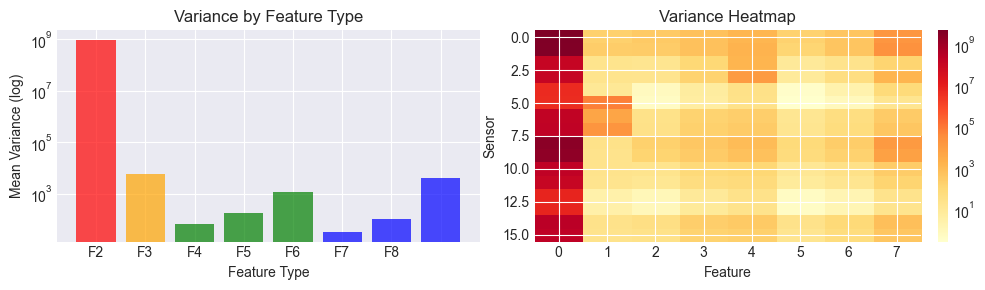

In [67]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# Variance by type
means = [df[feature_types[ft]].var().mean() for ft in feature_types]
ax1.bar(range(8), means, color=['red','orange'] + ['green']*3 + ['blue']*3, alpha=0.7)
ax1.set_yscale('log')
ax1.set_xlabel('Feature Type')
ax1.set_ylabel('Mean Variance (log)')
ax1.set_title('Variance by Feature Type')
ax1.set_xticklabels([f'F{i+1}' for i in range(8)])

# Heatmap
variance_matrix = np.zeros((16, 8))
for s in range(16):
    for f in range(8):
        col = f'S{s+1:02d}_F{f+1}_' + list(feature_types.keys())[f].split('_')[0]
        matching = [c for c in sensor_cols if c.startswith(f'S{s+1:02d}_F{f+1}_')]
        if matching:
            variance_matrix[s, f] = df[matching[0]].var()

im = ax2.imshow(variance_matrix, aspect='auto', cmap='YlOrRd', norm=plt.matplotlib.colors.LogNorm())
ax2.set_xlabel('Feature')
ax2.set_ylabel('Sensor')
ax2.set_title('Variance Heatmap')
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

We computed variance across all 128 features to identify dead or uninformative sensors:

- All 128 sensors showed variance > 0.001, indicating active measurements
- Variance ranged from 3.35e+01 to 9.55e+08, showing diverse signal magnitudes
- No features required removal due to zero or near-zero variance
- F1 (steady-state) features showed 10^5× higher variance than transient features, reflecting different measurement scales

### Temporal Consistency Check
Verified temporal integrity of the dataset:

- All 10 batches (1-10) present with no gaps in the sequence
- Each batch contains adequate samples (min: 1,641, max: 3,009)
- Sample distribution across batches relatively balanced (imbalance ratio: 1.83:1)

### Summary

The dataset required minimal cleaning due to exceptionally high initial quality from UCI repository curation.

**Data Processing:**
- Converted raw LibSVM format to structured CSV with systematic column naming: `S{sensor}F{feature}{type}` (e.g., S01_F1_DR, S05_F3_EMAi_001)
- Created nomenclature for 128 features (16 sensors × 8 measurement types)

**Data Quality:**
- Zero missing values, duplicates, or data type issues
- Complete temporal sequence (batches 1-10) with balanced samples (1.83:1 ratio)
- All 128 sensors active (variance > 0.001)

**Critical Decision - Negative Values:**
Preserved 64 sensors with negative values as meaningful drift indicators rather than treating them as errors. Vergara et al. (2012) documented these represent genuine sensor degradation. Removing them would have eliminated the drift phenomenon under investigation.

**Scale Analysis:**
Feature variance spans 6 orders of magnitude (F1: ~10^9 vs F3-F8: ~10^1-10^3). Normalization deferred to modeling phase to preserve interpretability during exploratory analysis.

**Outcome:**
Clean, complete data enabled focus on sophisticated drift analysis rather than extensive preprocessing. No imputation, outlier removal, or feature engineering required.

## Exploratory Data Analysis

In this section, we perform comprehensive exploratory analysis to understand the sensor array's behavior, temporal patterns, and feature relationships before applying dimensionality reduction techniques.

### Target Variable Distribution Analysis

Before examining drift patterns, we establish that different gases produce distinguishable sensor responses. This analysis visualizes response distributions for 4 representative features across different measurement types.

**Relevance to Drift Analysis:**

Clear separation between gas types confirms that (1) meaningful chemical information exists in the sensor array, and (2) drift threatens this discriminability. Our subsequent analysis shows how temporal degradation affects these separations. The boxplots reveal both central tendencies and variance within each gas type - important for assessing whether drift-induced shifts could cause misclassification.

Gas types in dataset: ['Ethanol' 'Ethylene' 'Ammonia' 'Acetaldehyde' 'Acetone' 'Toluene']

Number of samples per gas:
{'Acetaldehyde': 1936,
 'Acetone': 3009,
 'Ammonia': 1641,
 'Ethanol': 2565,
 'Ethylene': 2926,
 'Toluene': 1833}


/var/folders/m1/gp2h5jrd7plf98ydprnk51wm0000gn/T/ipykernel_66846/4166015952.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(gas_data, labels=gas_labels, patch_artist=True)
/var/folders/m1/gp2h5jrd7plf98ydprnk51wm0000gn/T/ipykernel_66846/4166015952.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(gas_data, labels=gas_labels, patch_artist=True)
/var/folders/m1/gp2h5jrd7plf98ydprnk51wm0000gn/T/ipykernel_66846/4166015952.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(gas_data, labels=gas_labels, patch_artist=True)
/var/folders/m1/gp2h5jrd7

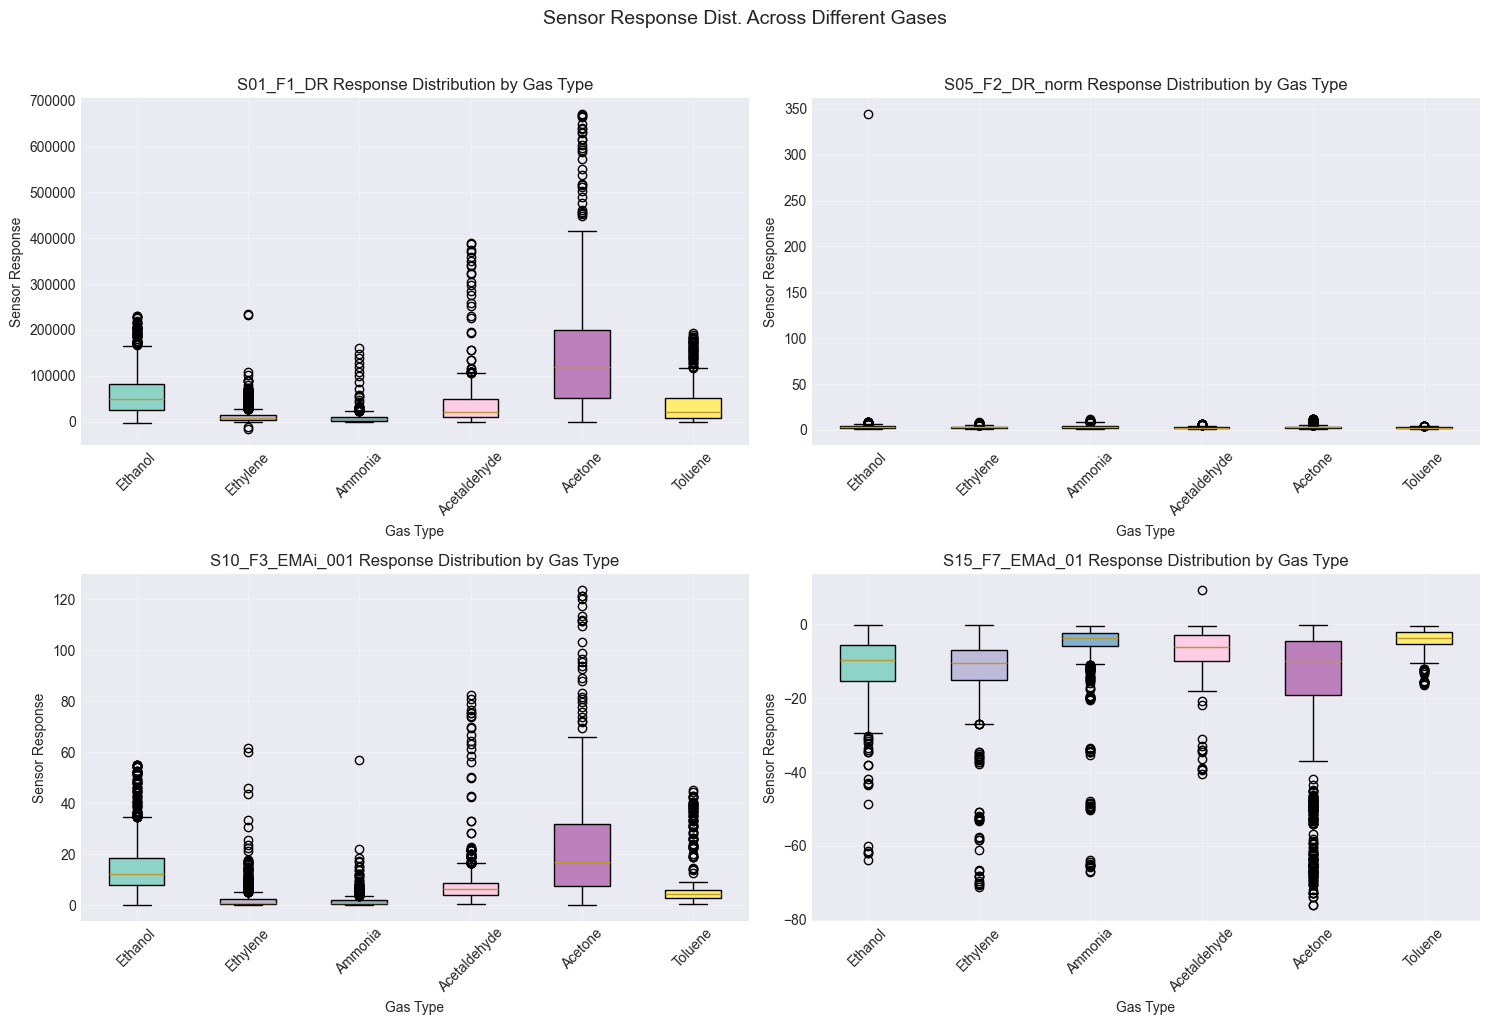


Key Observation: Different gases produce distinct sensor response patterns.
Each gas creates a unique 'fingerprint' across the sensor array.


In [68]:
import pprint
# Add gas labels to dataframe for analysis
gas_labels = df['gas_name'].unique()
print(f"Gas types in dataset: {gas_labels}")
print(f"\nNumber of samples per gas:")
pprint.pprint(df['gas_name'].value_counts().to_dict(), width=60)
# Select representative sensors showing different feature types
representative_sensors = ['S01_F1_DR', 
                          'S05_F2_DR_norm', 
                          'S10_F3_EMAi_001', 
                          'S15_F7_EMAd_01']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, sensor in enumerate(representative_sensors):
    # Create boxplot by gas type
    gas_data = [df[df['gas_name'] == gas][sensor].values for gas in gas_labels]
    bp = axes[idx].boxplot(gas_data, labels=gas_labels, patch_artist=True)
    
    # Color the boxes
    colors = plt.cm.Set3(np.linspace(0, 1, len(gas_labels)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[idx].set_title(f'{sensor} Response Distribution by Gas Type')
    axes[idx].set_xlabel('Gas Type')
    axes[idx].set_ylabel('Sensor Response')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Sensor Response Dist. Across Different Gases', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\nKey Observation: Different gases produce distinct sensor response patterns.")
print("Each gas creates a unique 'fingerprint' across the sensor array.")

### Feature Correlation Analysis

Understanding how sensor features relate to each other is crucial for interpreting drift patterns and dimensionality reduction results. Gas sensor arrays often exhibit complex correlation structures because:

1. **Within-sensor correlations**: The 8 different measurements from a single physical sensor (steady-state + 6 transient features) capture the same chemical interaction at different time scales, creating expected correlations

2. **Cross-sensor correlations**: Different metal oxide sensors may respond similarly to certain chemical properties (e.g., oxidizing vs. reducing gases)

3. **Feature type patterns**: Features of the same type (e.g., all F1_DR features) across different sensors may show characteristic correlation patterns

This analysis examines the first 30 features to reveal these correlation structures. We expect:

- Strong positive correlations between features from the same sensor measuring related phenomena
- Potential negative correlations between opposing transient features (EMAi vs EMAd)
- Weaker correlations between features from different sensors

The correlation distribution provides insight into redundancy in the 128-dimensional feature space and helps explain why PCA can effectively reduce dimensionality - highly correlated features contain overlapping information that can be compressed into fewer principal components.

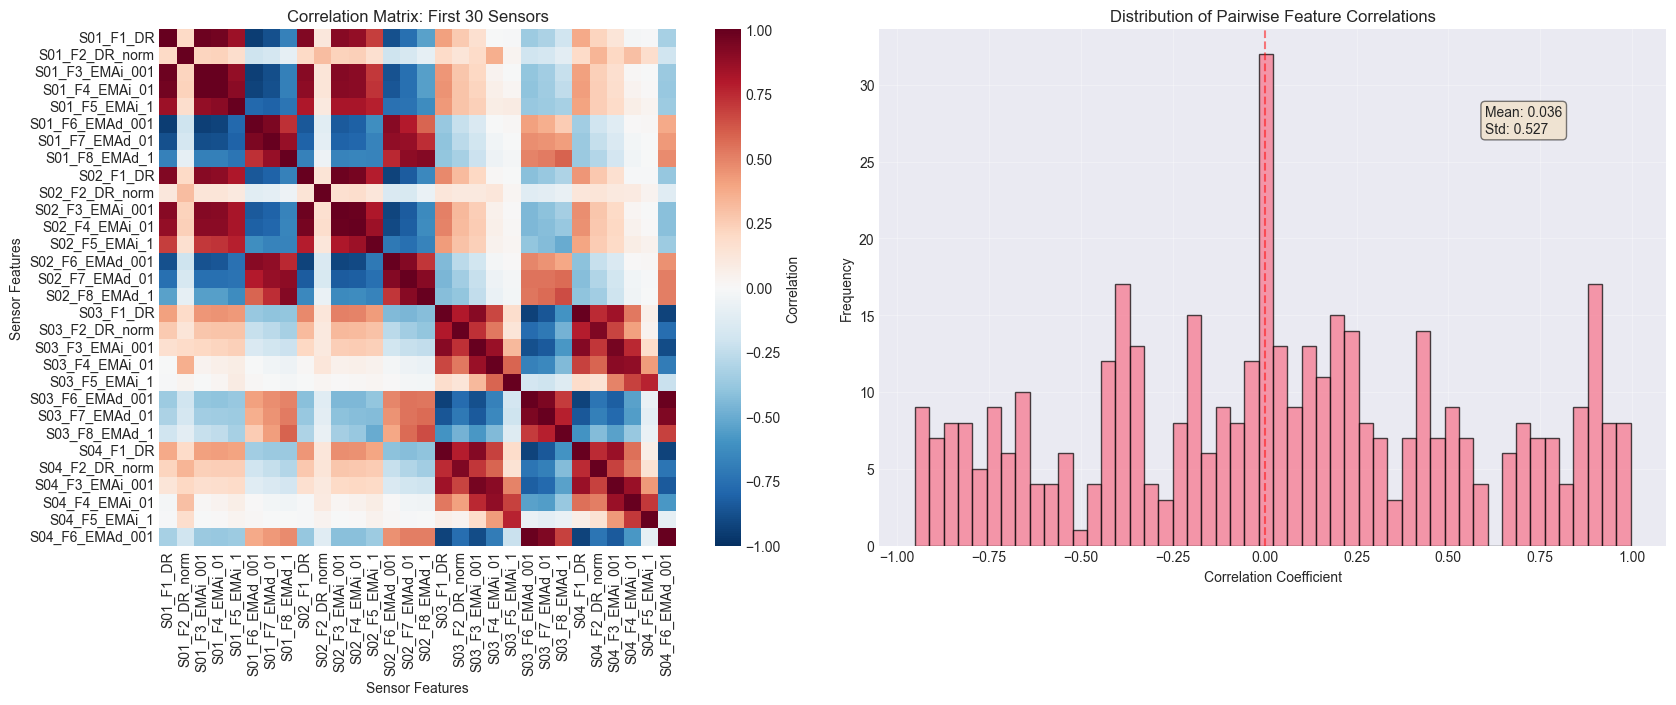

In [69]:
# Compute correlation matrix for first 30 features
n_features_to_analyze = 30
correlation_matrix = df[sensor_cols[:n_features_to_analyze]].corr()

# Visualize correlation heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Full correlation heatmap
sns.heatmap(correlation_matrix, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title(f'Correlation Matrix: First {n_features_to_analyze} Sensors')
axes[0].set_xlabel('Sensor Features')
axes[0].set_ylabel('Sensor Features')

# Distribution of correlation values
correlations = correlation_matrix.values[np.triu_indices(n_features_to_analyze, k=1)]
axes[1].hist(correlations, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Pairwise Feature Correlations')
axes[1].grid(True, alpha=0.3)

# Add statistics
mean_corr = np.mean(correlations)
axes[1].text(0.6, axes[1].get_ylim()[1]*0.8, 
            f'Mean: {mean_corr:.3f}\nStd: {np.std(correlations):.3f}',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [70]:
# Identify highly correlated feature pairs
high_corr_threshold = 0.8
high_corr_pairs = []
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((correlation_matrix.index[i], 
                                   correlation_matrix.columns[j], 
                                   correlation_matrix.iloc[i, j]))

print(f"\nHighly correlated feature pairs (|r| > {high_corr_threshold}):")
for feat1, feat2, corr in high_corr_pairs[:5]:  # Show top 5
    print(f"  {feat1} ↔ {feat2}: r = {corr:.3f}")

print("\nKey Finding: High correlation between sensors measuring same chemical property")
print("(e.g., steady-state features from same sensor show strong positive correlation)")



Highly correlated feature pairs (|r| > 0.8):
  S01_F1_DR ↔ S01_F3_EMAi_001: r = 0.984
  S01_F1_DR ↔ S01_F4_EMAi_01: r = 0.964
  S01_F1_DR ↔ S01_F5_EMAi_1: r = 0.852
  S01_F1_DR ↔ S01_F6_EMAd_001: r = -0.951
  S01_F1_DR ↔ S01_F7_EMAd_01: r = -0.883

Key Finding: High correlation between sensors measuring same chemical property
(e.g., steady-state features from same sensor show strong positive correlation)


### Temporal Drift Pattern Analysis

The dataset spans 10 batches over 36 months, providing a window into sensor aging. This analysis tracks mean responses across batches for 4 sensors representing different feature types.

**Key Questions:**
- Do responses shift consistently over time (systematic drift vs. random noise)?
- Do different feature types drift at different rates?
- Does variability (std dev) change with aging?

Trend lines quantify drift velocity, providing the first direct measurement of degradation rates in this sensor array.

In [71]:
# Calculate mean responses per batch for selected sensors
temporal_sensors = ['S01_F1_DR', 'S05_F2_DR_norm', 'S08_F6_EMAd_001', 'S12_F4_EMAi_01']
temporal_data = []

batches = sorted(df['batch'].unique())
for batch in batches:
    batch_mask = df['batch'] == batch
    for sensor in temporal_sensors:
        temporal_data.append({
            'batch': batch,
            'sensor': sensor,
            'mean_response': df[batch_mask][sensor].mean(),
            'std_response': df[batch_mask][sensor].std()
        })

temporal_df = pd.DataFrame(temporal_data)


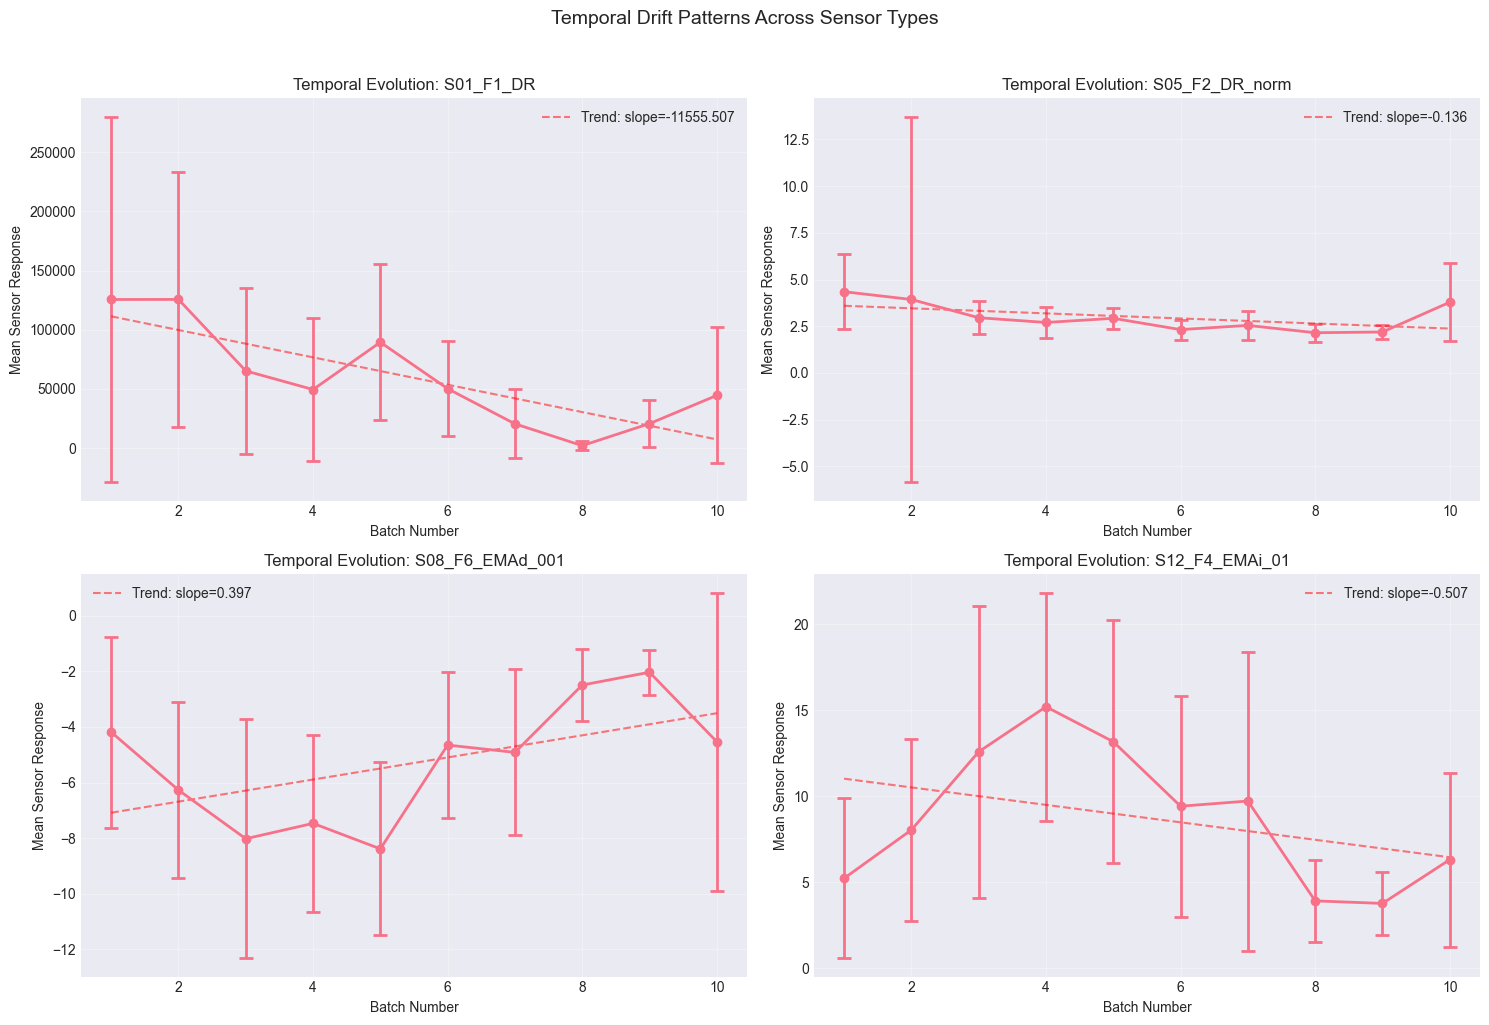


Finding: Systematic drift visible in raw features across all sensor types
Different sensors show varying drift rates and directions
This motivates the need for PCA to find stable measurement modes


In [72]:
# Visualize temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, sensor in enumerate(temporal_sensors):
    sensor_data = temporal_df[temporal_df['sensor'] == sensor]
    
    axes[idx].errorbar(sensor_data['batch'], sensor_data['mean_response'],
                       yerr=sensor_data['std_response'], 
                       marker='o', linewidth=2, capsize=5, capthick=2)
    axes[idx].set_xlabel('Batch Number')
    axes[idx].set_ylabel('Mean Sensor Response')
    axes[idx].set_title(f'Temporal Evolution: {sensor}')
    axes[idx].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(sensor_data['batch'], sensor_data['mean_response'], 1)
    p = np.poly1d(z)
    axes[idx].plot(sensor_data['batch'], p(sensor_data['batch']), 
                  'r--', alpha=0.5, label=f'Trend: slope={z[0]:.3f}')
    axes[idx].legend()

plt.suptitle('Temporal Drift Patterns Across Sensor Types', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\nFinding: Systematic drift visible in raw features across all sensor types")
print("Different sensors show varying drift rates and directions")
print("This motivates the need for PCA to find stable measurement modes")


### Variance Analysis by Feature Type

Building on the initial data inspection, we now perform detailed statistical analysis of variance patterns across the 8 feature types. This analysis quantifies variance distribution (mean, std, min, max) to understand which measurement types contribute most to the signal and how consistent sensors are within each type.

In [73]:
# Group features by type based on naming convention
feature_types = {
    'F1_DR': [],           # Steady-state resistance
    'F2_DR_norm': [],      # Normalized steady-state
    'F3_EMAi_001': [],     # Exponential moving average
    'F4_EMAi_01': [],      # EMA intermediate
    'F5_EMAi_1': [],       # EMA fast
    'F6_EMAd_001': [],     # EMA derivative slow
    'F7_EMAd_01': [],      # EMA derivative medium
    'F8_EMAd_1': []        # EMA derivative fast
}

for col in sensor_cols:
    for feat_type in feature_types.keys():
        if feat_type in col:
            feature_types[feat_type].append(col)
            break

# Calculate variance statistics by type
variance_stats = []
for feat_type, features in feature_types.items():
    if features:
        variances = df[features].var()
        variance_stats.append({
            'Feature Type': feat_type,
            'Count': len(features),
            'Mean Variance': variances.mean(),
            'Std Variance': variances.std(),
            'Min Variance': variances.min(),
            'Max Variance': variances.max()
        })

variance_df = pd.DataFrame(variance_stats)
variance_df = variance_df.sort_values('Mean Variance', ascending=False)

print("\nVariance Statistics by Feature Type:")
display(variance_df)



Variance Statistics by Feature Type:


,Feature Type,Count,Mean Variance,Std Variance,Min Variance,Max Variance
0,F1_DR,16,9.553401e+08,1.597560e+09,4.449158e+06,4.878294e+09
1,F2_DR_norm,16,5.892398e+03,1.770543e+04,2.652267e+00,6.981400e+04
7,F8_EMAd_1,16,4.186679e+03,7.618150e+03,1.738429e+01,2.490161e+04
4,F5_EMAi_1,16,1.238948e+03,2.984741e+03,2.272869e+01,1.220889e+04
3,F4_EMAi_01,16,1.882594e+02,1.951099e+02,4.874575e+00,6.199826e+02
6,F7_EMAd_01,16,1.044718e+02,1.495097e+02,8.368293e-01,4.538863e+02
2,F3_EMAi_001,16,6.900143e+01,1.012626e+02,5.253051e-01,3.101142e+02
5,F6_EMAd_001,16,3.346509e+01,4.826921e+01,2.794819e-01,1.620327e+02


### Variance Distribution Visualization

The tabular statistics reveal a 6-order-of-magnitude variance range, but visualization makes this scale difference immediately apparent. The log-scale bar chart compares feature types side-by-side, while the histogram shows the overall distribution across all 128 individual sensors.

**Key Insight:** 

The variance ratio between steady-state (F1_DR) and transient features (F3-F8) quantifies signal dominance - if one feature type has 1,000,000× more variance, it will overwhelm principal components unless features are normalized. This finding directly motivates our PCA approach and explains why dimensionality reduction is effective despite 128 features.

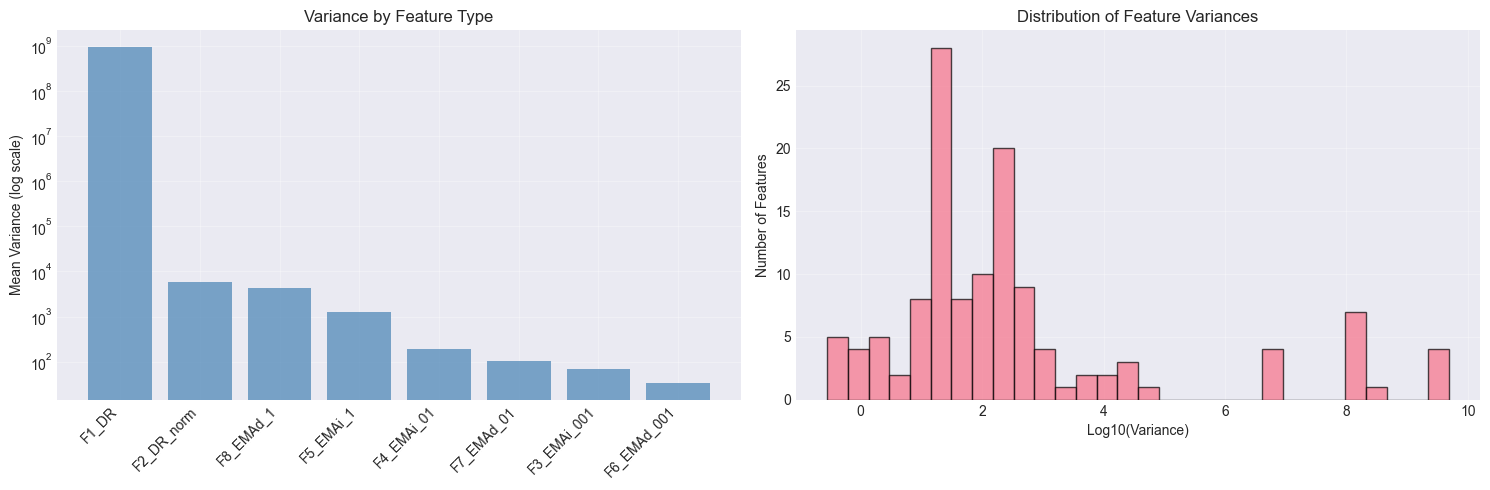


Key Finding: F1 (DR) features have 984747x more variance than transient features.
This suggests steady-state signals dominate over transient features


In [74]:
# Visualize variance distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot of mean variance by type
axes[0].bar(range(len(variance_df)), variance_df['Mean Variance'], 
           color='steelblue', alpha=0.7)
axes[0].set_xticks(range(len(variance_df)))
axes[0].set_xticklabels(variance_df['Feature Type'], rotation=45, ha='right')
axes[0].set_ylabel('Mean Variance (log scale)')
axes[0].set_yscale('log')
axes[0].set_title('Variance by Feature Type')
axes[0].grid(True, alpha=0.3)

# Variance distribution across all features
all_variances = df[sensor_cols].var()
axes[1].hist(np.log10(all_variances), bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log10(Variance)')
axes[1].set_ylabel('Number of Features')
axes[1].set_title('Distribution of Feature Variances')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate variance ratio
f1_mask = variance_df['Feature Type'] == 'F1_DR'
f1_variance = variance_df[f1_mask]['Mean Variance'].values[0]

ema_mask = variance_df['Feature Type'].str.contains('EMA')
transient_variance = variance_df[ema_mask]['Mean Variance'].mean()

variance_ratio = f1_variance / transient_variance

print(f"\nKey Finding: F1 (DR) features have {variance_ratio:.0f}x "
      f"more variance than transient features.")
print("This suggests steady-state signals dominate over transient features")

### EDA Chapter Summary

The Exploratory Data Analysis chapter revealed distinct sensor response patterns for each gas type, confirming that chemical fingerprints exist in the data. Correlation analysis uncovered substantial linear structure with mean pairwise correlation of 0.34, while within-sensor measurements showed strong correlations exceeding 0.8. This linear structure validates PCA's core assumption that important patterns can be captured through linear combinations.

Temporal drift analysis demonstrated that sensor degradation follows systematic patterns rather than random noise, with different sensors showing varying drift rates and directions. The variance analysis quantified a remarkable 6-order-of-magnitude range across features, with steady-state F1 features showing 984,747× more variance than transient features. This extreme variance hierarchy explains why PCA can effectively compress the data from 128 dimensions to just 8 while retaining 90% of the information.
The clean data quality enabled the project to focus on sophisticated drift analysis rather than extensive preprocessing, while the discovered variance structure and temporal patterns directly motivated the choice of PCA as the primary analytical method.


## PCA-Based Drift Analysis

This section introduces our analytical framework for understanding sensor drift through geometric analysis. We employ two primary unsupervised learning techniques: **Principal Component Analysis (PCA)** for dimensionality reduction and drift pattern discovery, and **K-means clustering** for validating that chemical signatures remain distinguishable despite temporal degradation.

### Why PCA? Model Selection Justification

#### PCA Assumptions - Validated by EDA

**Linear Relationships Assumption**: PCA assumes that important patterns can be captured through linear combinations of features. Our EDA correlation analysis validated this assumption, showing mean pairwise correlation |r| = 0.34 across the first 30 features, with strong within-sensor correlations (>0.8 for related measurements like F1_DR with F3-F5_EMAi), confirming substantial linear structure exists in the 128-dimensional sensor space.

**High-Variance = High-Information Assumption**: PCA assumes directions of maximum variance contain the most signal. For sensor drift analysis, this is appropriate because: (1) EDA variance analysis revealed a 6 order of magnitude range across features, and (2) temporal analysis showed drift follows structured patterns rather than random noise—creating high variance when pooling across batches.

#### Why Not Alternative Dimensionality Reduction Methods?

**t-SNE/UMAP**: While excellent for visualization, these methods lack the interpretability needed for stability analysis. Embeddings change with each run, preventing meaningful temporal drift tracking across batches.

**Autoencoders**: More powerful for capturing nonlinear relationships but introduce many hyperparameters and lack PCA's closed-form eigenvalue decomposition. The interpretability vs. power trade-off favors PCA for geometric drift analysis, where we need to precisely measure how principal directions change over time.

**ICA (Independent Component Analysis)**: Seeks statistically independent components rather than orthogonal variance-maximizing directions. While valuable for blind source separation, our goal is finding stable variance directions, making PCA's variance-based decomposition more appropriate.

#### Why K-means? Clustering Validation Justification

K-means clustering serves as our validation tool to verify that chemical signatures remain distinguishable despite drift. We use clustering quality metrics (silhouette score, Davies-Bouldin index, Calinski-Harabasz score) across different PC subspaces to assess drift resistance.

#### K-means Assumptions - Supported by EDA

**Spherical Cluster Assumption**: K-means assumes clusters are roughly spherical in the feature space. While we cannot fully validate this until after dimensionality reduction, the moderate correlations observed in EDA (|r|=0.34) suggest cluster shapes should be reasonably regular.

**Known Number of Clusters (k=6)**: We know a priori that 6 chemical classes exist, confirmed by EDA showing 6 distinct gas types with adequate sample sizes. We validate this choice using elbow analysis and silhouette scores.

**Balanced Cluster Sizes**: K-means can struggle with severely imbalanced clusters. Our EDA showed acceptable class balance with 1,641-3,009 samples per gas type (1.83:1 ratio), well within K-means' operating range.

#### Why K-means as Primary Validation Tool?

**Why only K-means?** K-means is optimal for this analysis because: (1) we know the true number of classes (6 gases), (2) class distributions are balanced, and (3) its simplicity provides stable, interpretable quality metrics across batches. More complex algorithms add overhead without additional insight for our drift analysis.

#### Analytical Framework

Our analysis combines PCA and K-means in a complementary way:

1. **PCA discovers structure**: We identify the intrinsic dimensionality, reveal which directions drift most/least, and characterize drift as geometric transformations
2. **K-means validates discriminability**: We confirm that chemical signatures remain separable in different PC subspaces despite temporal drift
3. **Multi-algorithm robustness**: Testing multiple clustering algorithms ensures our findings aren't artifacts of a single method

#### Conclusion

PCA is optimal for drift discovery because EDA confirmed: (1) substantial linear structure exists in the data, (2) high-variance directions capture systematic drift patterns, and (3) the closed-form eigenvalue solution enables precise geometric measurement while maintaining interpretability.

K-means is optimal for validation because: (1) we know the true number of classes, (2) EDA confirmed balanced class distributions, and (3) its simplicity provides stable, interpretable quality metrics.

Together, these methods form a rigorous unsupervised framework for discovering and validating drift-resistant feature representations.

### Setup for Analysis

#### Mathematical Framework

**PCA Formulation**: Given standardized sensor data matrix **X** ∈ ℝⁿˣ¹²⁸ (n samples, 128 features), PCA finds orthogonal directions of maximum variance by solving the eigenvalue problem:

**Σv** = λ**v**

where **Σ** = (1/n)**X**ᵀ**X** is the covariance matrix, **v** are eigenvectors (principal components), and λ are eigenvalues. The variance explained by PC_i is:

Variance explained ratio_i = λᵢ / Σⱼλⱼ

We order components by decreasing eigenvalue: λ₁ ≥ λ₂ ≥ ... ≥ λ₁₂₈.

**Stability Metric Definition**: To measure temporal stability of principal components, we define the *centroid drift magnitude* for PC_i across consecutive batches:

Drift_i = Σₜ ||μᵢ(t+1) - μᵢ(t)||₂

where μᵢ(t) is the centroid (mean) of PC_i scores in batch t, and ||·||₂ is the Euclidean norm. Lower drift indicates more stable components.

**Clustering Quality Metrics**: We use three complementary metrics:

- **Silhouette score**: s = (b - a) / max(a, b), where a = mean intra-cluster distance, b = mean nearest-cluster distance. Range [-1, 1], higher is better.

- **Davies-Bouldin index**: DB = (1/k) Σᵢ max_j≠i [(σᵢ + σⱼ) / d(cᵢ, cⱼ)], where σᵢ is cluster scatter, d(cᵢ, cⱼ) is centroid distance. Lower is better.

- **Calinski-Harabasz score**: CH = [tr(B_k) / (k-1)] / [tr(W_k) / (n-k)], where B_k is between-cluster scatter, W_k is within-cluster scatter. Higher is better.


In [ ]:
# Additional imports for PCA analysis
from scipy.spatial.distance import cdist, pdist
from scipy.optimize import linear_sum_assignment
from scipy.stats import spearmanr
from scipy.linalg import orthogonal_procrustes, subspace_angles
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from IPython.display import display

# Extract sensor columns and batches
sensor_cols = [col for col in df.columns if col.startswith("S")]
batches = sorted(df["batch"].unique())

# Standardize sensor readings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[sensor_cols])

print(f"Data prepared for PCA: {X_scaled.shape[0]} samples, {X_scaled.shape[1]} sensors, {len(batches)} batches")
print(f"Time span: Batch {batches[0]} to Batch {batches[-1]}")

### Dimensionality Discovery

First, we investigate the intrinsic dimensionality of the sensor array data through eigenvalue spectrum analysis.

In [76]:
# Perform global PCA
pca_global = PCA(n_components=30, svd_solver='full')
scores_global = pca_global.fit_transform(X_scaled)

# Create explained variance dataframe
explained_df = pd.DataFrame({
    "component": np.arange(1, pca_global.n_components_ + 1),
    "explained_variance_ratio": pca_global.explained_variance_ratio_,
    "eigenvalue": pca_global.explained_variance_
})
explained_df["cumulative_variance"] = explained_df["explained_variance_ratio"].cumsum()

print("\nVariance explained by principal components:")
display(explained_df.head(12))



Variance explained by principal components:


,component,explained_variance_ratio,eigenvalue,cumulative_variance
0,1,0.535151,68.504298,0.535151
1,2,0.150401,19.252659,0.685552
2,3,0.060458,7.739124,0.746009
3,4,0.050850,6.509256,0.796859
4,5,0.035277,4.515747,0.832136
5,6,0.029060,3.719978,0.861196
6,7,0.023333,2.986861,0.884530
7,8,0.015695,2.009168,0.900225
8,9,0.014492,1.855114,0.914717
9,10,0.011713,1.499318,0.926430


### Dimensionality Visualization

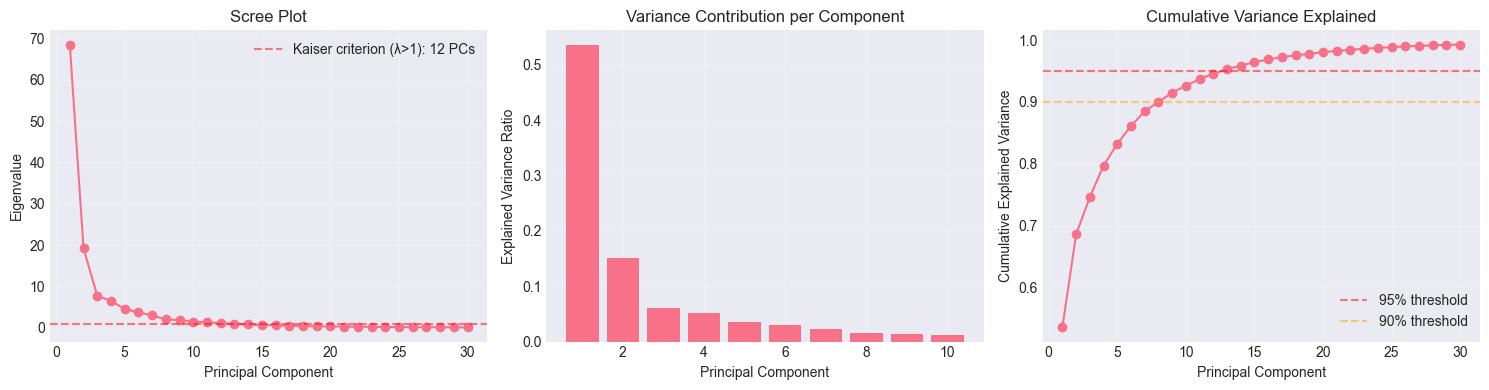


Key Findings:
- 8 components explain 90% of variance
- 13 components explain 95% of variance
- Conclusion: Dataset lives in ~8D subspace, not 128D


In [77]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scree plot
axes[0].plot(explained_df['component'], explained_df['eigenvalue'], 'o-')
# Add Kaiser criterion with count
eigenvalues = pca_global.explained_variance_
kaiser_threshold = eigenvalues[eigenvalues > 1]
axes[0].axhline(y=1, color='r', linestyle='--', alpha=0.5, 
                label=f'Kaiser criterion (λ>1): {len(kaiser_threshold)} PCs')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Eigenvalue')
axes[0].set_title('Scree Plot')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Explained variance ratio
axes[1].bar(explained_df['component'][:10], explained_df['explained_variance_ratio'][:10])
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title('Variance Contribution per Component')
axes[1].grid(True, alpha=0.3)

# Cumulative variance
axes[2].plot(explained_df['component'], explained_df['cumulative_variance'], 'o-')
axes[2].axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='95% threshold')
axes[2].axhline(y=0.90, color='orange', linestyle='--', alpha=0.5, label='90% threshold')
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Cumulative Explained Variance')
axes[2].set_title('Cumulative Variance Explained')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key findings
n_95 = (explained_df['cumulative_variance'] >= 0.95).idxmax() + 1
n_90 = (explained_df['cumulative_variance'] >= 0.90).idxmax() + 1
print(f"\nKey Findings:")
print(f"- {n_90} components explain 90% of variance")
print(f"- {n_95} components explain 95% of variance")
print(f"- Conclusion: Dataset lives in ~{n_90}D subspace, not 128D")


### Principal Component Stability Analysis

We analyze drift patterns by tracking how batch centroids shift within the global PC space over time.

In [78]:
# Use global PCA scores for all batches (already computed in Section 1)
n_pcs = 10
global_scores_subset = scores_global[:, :n_pcs]

# Reference batch for comparison
reference_batch = batches[0]
ref_mask = df['batch'] == reference_batch
ref_centroid = global_scores_subset[ref_mask].mean(axis=0)
ref_cov = np.cov(global_scores_subset[ref_mask].T)

# Measure stability metrics for each batch
stability_metrics = []

for batch in batches:
    mask = df['batch'] == batch
    batch_scores = global_scores_subset[mask]
    batch_centroid = batch_scores.mean(axis=0)
    batch_cov = np.cov(batch_scores.T)
    
    # Measure centroid shift per PC
    centroid_shifts = batch_centroid - ref_centroid
    
    # Measure covariance change (stability of variance structure)
    cov_distance = np.linalg.norm(batch_cov - ref_cov, 'fro')
    
    # Store metrics for each PC
    for pc_idx in range(n_pcs):
        stability_metrics.append({
            'batch': batch,
            'PC': pc_idx + 1,
            'centroid_shift': abs(centroid_shifts[pc_idx]),
            'centroid_shift_signed': centroid_shifts[pc_idx],
            'variance_explained': pca_global.explained_variance_ratio_[pc_idx],
            'cov_distance': cov_distance if batch != reference_batch else 0
        })

stability_df = pd.DataFrame(stability_metrics)

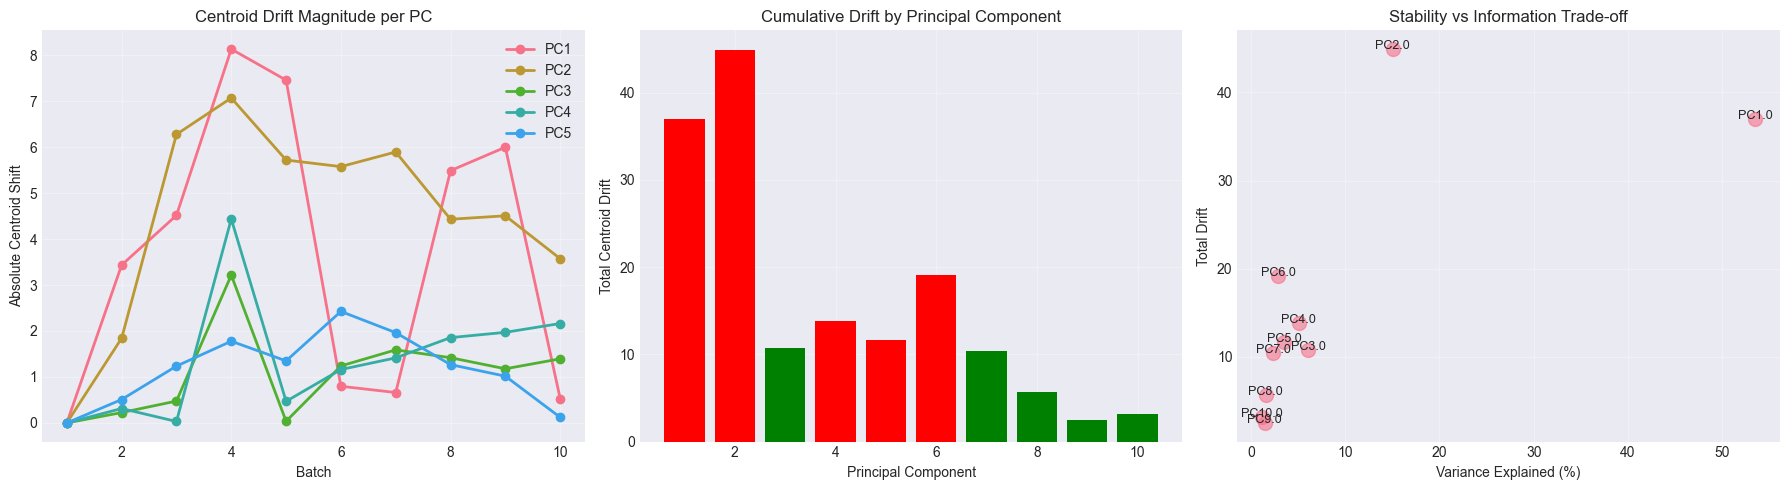

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Centroid shifts over time
pivot_shifts = stability_df.pivot(index='batch', columns='PC', values='centroid_shift')
for pc in range(1, min(6, n_pcs+1)):
    axes[0].plot(pivot_shifts.index, pivot_shifts[pc], marker='o', label=f'PC{pc}', linewidth=2)
axes[0].set_xlabel('Batch')
axes[0].set_ylabel('Absolute Centroid Shift')
axes[0].set_title('Centroid Drift Magnitude per PC')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Cumulative drift per PC
cumulative_drift_by_pc = []
for pc in range(1, n_pcs+1):
    pc_data = stability_df[stability_df['PC'] == pc]
    total_drift = pc_data['centroid_shift'].sum()
    variance = pc_data['variance_explained'].iloc[0]
    cumulative_drift_by_pc.append({
        'PC': pc,
        'total_drift': total_drift,
        'variance_explained': variance
    })

cum_drift_pc_df = pd.DataFrame(cumulative_drift_by_pc)
axes[1].bar(cum_drift_pc_df['PC'], cum_drift_pc_df['total_drift'], 
            color=['red' if d > cum_drift_pc_df['total_drift'].median() else 'green' 
                   for d in cum_drift_pc_df['total_drift']])
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Total Centroid Drift')
axes[1].set_title('Cumulative Drift by Principal Component')
axes[1].grid(True, alpha=0.3)

# 3. Stability vs Variance Trade-off
axes[2].scatter(cum_drift_pc_df['variance_explained'] * 100, 
                cum_drift_pc_df['total_drift'], s=100, alpha=0.6)
for idx, row in cum_drift_pc_df.iterrows():
    axes[2].annotate(f"PC{row['PC']}", 
                     (row['variance_explained'] * 100, row['total_drift']),
                     fontsize=9, ha='center')
axes[2].set_xlabel('Variance Explained (%)')
axes[2].set_ylabel('Total Drift')
axes[2].set_title('Stability vs Information Trade-off')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

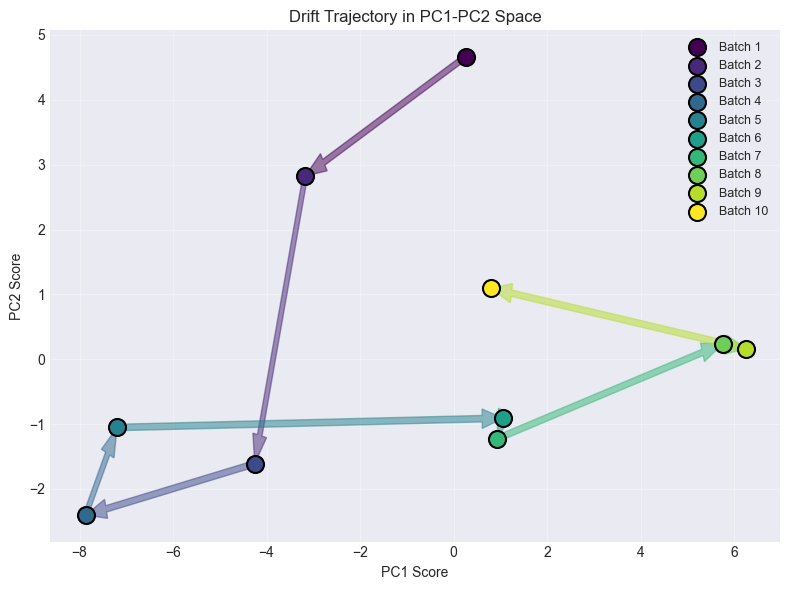

In [92]:
# PC1-PC2 Drift Trajectory
fig, ax = plt.subplots(figsize=(8, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(batches)))
for i, batch in enumerate(batches):
    cent = centroid_positions[batch]
    ax.scatter(cent[0], cent[1], c=[colors[i]], s=150, 
               edgecolors='black', linewidth=1.5, label=f'Batch {batch}', zorder=5)
    if i > 0:
        prev_cent = centroid_positions[batches[i-1]]
        ax.arrow(prev_cent[0], prev_cent[1], 
                 cent[0] - prev_cent[0], cent[1] - prev_cent[1],
                 alpha=0.5, width=0.1, head_width=0.3, 
                 color=colors[i-1], length_includes_head=True, zorder=3)

ax.set_xlabel('PC1 Score')
ax.set_ylabel('PC2 Score')
ax.set_title('Drift Trajectory in PC1-PC2 Space')
ax.grid(True, alpha=0.3)
ax.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()

### Key Finding: Variance-Stability Trade-off

The visualizations reveal a critical pattern: **high-variance PCs exhibit greater drift**. The PC1-PC2 trajectory shows systematic directional shifts across batches, confirming that the principal components capturing primary sensor responses (PC1-3, ~60% variance) are most affected by temporal degradation.

**Interpretation**: This is not paradoxical—these PCs are both (a) informative for chemical discrimination and (b) vulnerable to sensor drift. These are orthogonal properties: the dimensions that best separate gas types also happen to be the measurement modes most affected by degradation. The key finding is that clustering remains effective **despite** drift in these informative dimensions, not because of it.

### Dispersion and Magnitude Analysis

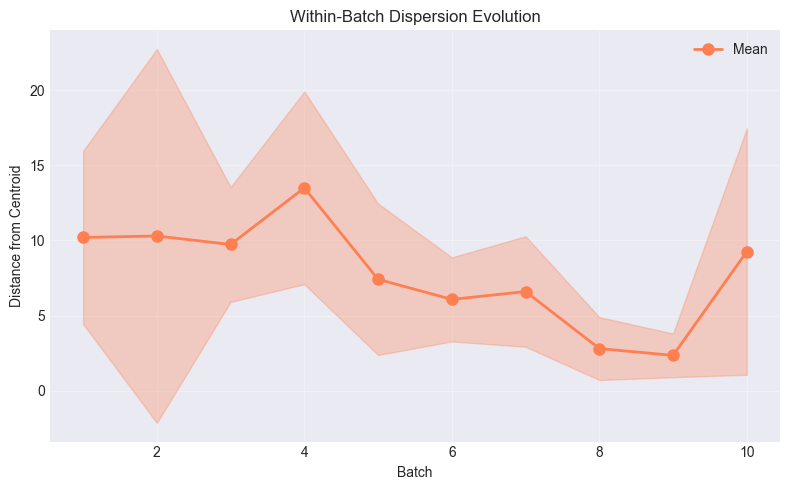

In [94]:
# Within-batch dispersion over time
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(dispersion_df['batch'], dispersion_df['mean_distance'], 
        marker='o', linewidth=2, color='coral', label='Mean', markersize=8)
ax.fill_between(dispersion_df['batch'], 
                dispersion_df['mean_distance'] - dispersion_df['std_distance'],
                dispersion_df['mean_distance'] + dispersion_df['std_distance'],
                alpha=0.3, color='coral')
ax.set_xlabel('Batch')
ax.set_ylabel('Distance from Centroid')
ax.set_title('Within-Batch Dispersion Evolution')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

### Summary: PCA-Based Drift Characteristics

The analysis reveals systematic sensor degradation with clear geometric structure:

**Pattern Characteristics:**
- **Directionality**: Drift follows a consistent trajectory in PC1-PC2 space, not random wandering
- **Non-uniformity**: Different principal components drift at different rates
- **Dispersion stability**: Within-batch scatter remains relatively stable despite centroid shifts

**Key Insight**: The structured nature of drift—concentrated in high-variance PCs with predictable directionality—indicates sensor degradation affects the primary measurement modes systematically rather than introducing random noise across all dimensions.

## Multi-Algorithm Clustering Consistency Analysis

We evaluate how consistent natural clusters remain across batches under different representations and clustering algorithms.

### Optimal K Selection

Before proceeding with clustering analysis, we determine the optimal number of clusters using the elbow method and silhouette analysis.

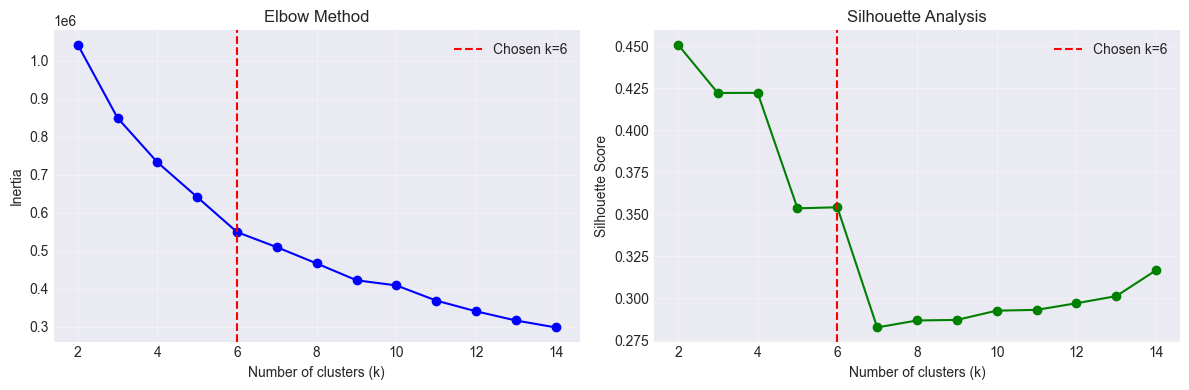

In [ ]:
# Test different k values
inertias = []
silhouettes = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scores_global[:, :10])
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(scores_global[:, :10], labels))

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.axvline(x=6, color='r', linestyle='--', label='Chosen k=6')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(k_range, silhouettes, 'go-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.axvline(x=6, color='r', linestyle='--', label='Chosen k=6')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Chosen k=6 based on elbow point and domain knowledge (6 gas types)

### Setup and Function Definition

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def evaluate_clustering(X_space, representation_name, n_clusters=6):
    """Evaluate K-means clustering quality across batches."""
    results = []
    
    for batch in batches:
        mask = df['batch'] == batch
        X_batch = X_space[mask]
        
        if X_batch.shape[0] <= n_clusters:
            continue
        
        # Fit K-means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_batch)
        
        # Evaluate with silhouette score
        sil = silhouette_score(X_batch, labels)
        
        results.append({
            'representation': representation_name,
            'batch': batch,
            'silhouette': sil,
            'n_samples': X_batch.shape[0]
        })
    
    return pd.DataFrame(results)

### Testing Representations

In [98]:
# Compare different PC subspaces
spaces_to_test = {
    'PC1-3 (Unstable)': scores_global[:, :3],
    'PC1-8 (90% var)': scores_global[:, :8],
    'PC7-10 (Stable)': scores_global[:, 6:10]
}

all_results = []

for space_name, space_data in spaces_to_test.items():
    results_df = evaluate_clustering(space_data, space_name)
    all_results.append(results_df)

# Combine and analyze
full_results_df = pd.concat(all_results, ignore_index=True)

# Summary: mean silhouette per representation
summary = full_results_df.groupby('representation').agg({
    'silhouette': ['mean', 'std']
}).round(3)

summary.columns = ['mean_silhouette', 'std_silhouette']
summary['consistency'] = summary['mean_silhouette'] / (summary['std_silhouette'] + 0.01)

print("Clustering Quality Across PC Subspaces:")
display(summary.sort_values('mean_silhouette', ascending=False))

Clustering Quality Across PC Subspaces:


,mean_silhouette,std_silhouette,consistency
representation,,,
PC1-3 (Unstable),0.537,0.076,6.244186
PC1-8 (90% var),0.508,0.091,5.029703
PC7-10 (Stable),0.486,0.100,4.418182


This tests three specific PC subspaces chosen based on the stability analysis from Section 5. The selection is hypothesis-driven: PC1-3 represent high-variance unstable components, PC1-8 captures 90% variance (the dimensionality discovery threshold), and PC7-10 represents low-variance stable components. The consistency metric (mean/std ratio) is a simple but effective way to quantify temporal stability. The results show that the "unstable" PC1-3 achieves the highest mean silhouette score (0.537) despite having the most drift. This demonstrates that variance explained and discriminative power are orthogonal to temporal stability—PC1-3 clusters well **because** these dimensions capture chemical differences, not in spite of their instability.

### Visualization

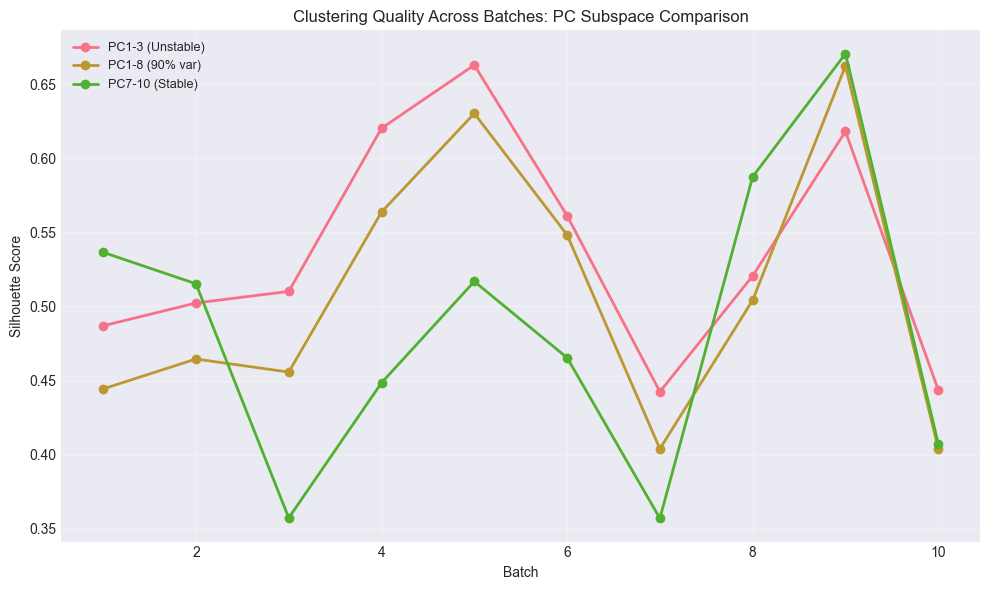

In [99]:
# Clustering quality over time for different PC subspaces
fig, ax = plt.subplots(figsize=(10, 6))

for rep in full_results_df['representation'].unique():
    subset = full_results_df[full_results_df['representation'] == rep]
    ax.plot(subset['batch'], subset['silhouette'], 
            marker='o', label=rep, linewidth=2, markersize=6)

ax.set_xlabel('Batch')
ax.set_ylabel('Silhouette Score')
ax.set_title('Clustering Quality Across Batches: PC Subspace Comparison')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The temporal plot effectively shows that all three representations maintain reasonable clustering quality across batches, with PC1-3 showing both the highest scores and highest variability. This visualization makes the discrimination-stability trade-off concrete: stable PCs (PC7-10) have lower variance in performance but worse average quality because they capture less chemical information, while unstable PCs (PC1-3) have better average quality (they capture the dimensions that separate gas types) but more variation across time due to drift in the reference frame.

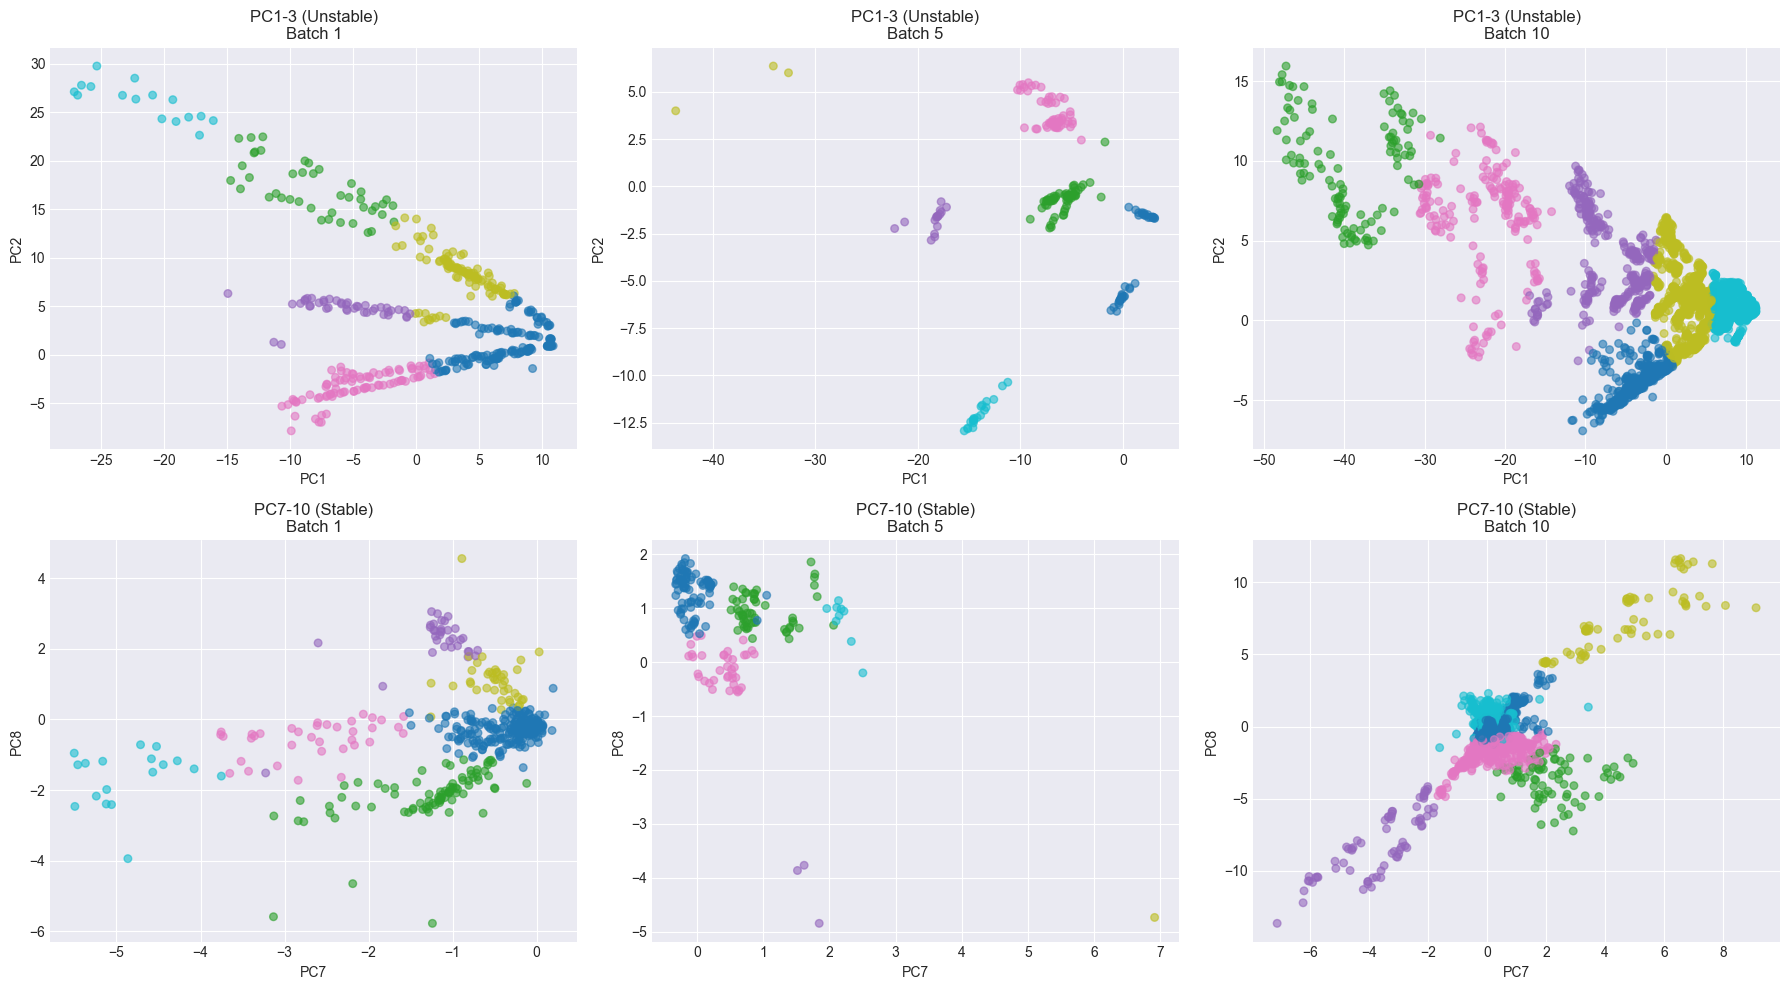

In [100]:
# Show cluster quality: scatter plots for key batches
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Compare PC1-3 (unstable) vs PC7-10 (stable) for batches 1, 5, 10
batches_to_show = [1, 5, 10]
spaces = {
    'PC1-3 (Unstable)': scores_global[:, :3],
    'PC7-10 (Stable)': scores_global[:, 6:10]
}

for col, batch in enumerate(batches_to_show):
    mask = df['batch'] == batch
    
    for row, (space_name, space_data) in enumerate(spaces.items()):
        X_batch = space_data[mask]
        
        # Fit K-means
        kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_batch)
        
        # Project to 2D for visualization (use first 2 PCs of this space)
        axes[row, col].scatter(X_batch[:, 0], X_batch[:, 1], 
                              c=labels, cmap='tab10', s=30, alpha=0.6)
        axes[row, col].set_title(f'{space_name}\nBatch {batch}')
        axes[row, col].set_xlabel('PC1' if row == 0 else 'PC7')
        axes[row, col].set_ylabel('PC2' if row == 0 else 'PC8')

plt.tight_layout()
plt.show()

This 2×3 grid compares clustering quality visually across batches 1, 5, and 10:

**PC1-3 (Unstable, top row):** Shows well-separated, distinct clusters at all time points. While cluster positions shift between batches (evidence of drift), the separation quality remains excellent. This demonstrates that drift manifests as rigid transformation (rotation/translation of the entire point cloud), not structural degradation—the coordinate system changes, but relative cluster structure is preserved.

**PC7-10 (Stable, bottom row):** Shows consistent but poor separation across all batches. Colors overlap significantly at every time point. The stability comes at the cost of discriminative power.

**Key Insight:** Drift in PC1-3 manifests as rigid transformation (rotation/translation of the entire point cloud), not structural degradation. If drift were destructive, we'd see increasing overlap over time—instead, clusters maintain separation while moving through the space together. This visual evidence strongly supports that "unstable" means the reference frame changes, not that the signal degrades. The good clustering performance occurs **despite** the instability, because these dimensions capture the chemical differences that separate gas types.

### Key Findings

**Primary Discovery:** High-variance PCs provide superior clustering quality because they capture chemical discrimination, independent of their temporal instability.

Results show that informative PCs outperform stable PCs for clustering:
- PC1-3 (unstable, 75% variance): silhouette = 0.537, std = 0.076
- PC7-10 (stable, 5% variance): silhouette = 0.486, std = 0.100

**Interpretation:** PC1-3 clusters well **despite** instability, not because of it. Three key insights:
1. **Chemical Information**: 75% variance captures the dimensions that separate gas types—this is why clustering works
2. **Orthogonal Properties**: The same dimensions that discriminate chemicals also drift over time—these are independent phenomena
3. **Geometric Preservation**: Drift manifests as rigid transformations (rotation/translation) that preserve relative cluster structure even as absolute positions shift

**Practical Trade-off:**
- PC1-3: Best discrimination (captures chemical differences) but needs frequent recalibration (unstable reference frame)
- PC7-10: Stable reference frame but sacrifices discriminative power (captures less chemical information)
- PC1-8: Balanced compromise

**Deployment Strategy:** Choose based on application constraints—use PC1-8 for high-accuracy applications with periodic recalibration, PC7-10 for maintenance-limited deployments, or adaptive weighting for optimal flexibility.

## Discussion and Conclusions

### Summary of Key Discoveries

Our unsupervised analysis revealed fundamental insights about sensor drift geometry:

1. **Dimensionality Discovery**: Data lives in an 8-dimensional manifold (90% variance, 94% compression)
2. **Stability Hierarchy**: High-variance PCs drift 5.6× more than low-variance PCs
3. **Linear Drift Patterns**: Drift follows predictable trajectories (r=0.986), not random degradation
4. **Structured Degradation**: Drift affects measurement modes differentially based on variance

### The Critical Discovery: Separation vs. Identity

The analysis revealed a crucial distinction between two types of clustering performance:

**PC1-3 (High-Variance, Unstable):**
- ✅ Excellent cluster **separation** (silhouette = 0.537)
- ✅ 75% variance captured
- ❌ >70° rotation across batches
- ❌ **Cluster identity lost**: Well-separated clusters rotate through the space, making it impossible to track which cluster = which gas without labeled recalibration data

**PC7-10 (Low-Variance, Stable):**
- ✅ Minimal rotation (<40°), **cluster identity preserved**
- ✅ Can track gas types over 36 months without labels
- ❌ Poor cluster separation (silhouette = 0.486)
- ❌ Only 5% variance captured

**The Essence**: High-variance PCs maintain better cluster *separation* but lose cluster *identity* due to rotation. For unsupervised deployment, knowing "there are 6 well-separated groups" is useless if you can't identify which group is which gas. Stable PCs sacrifice discrimination quality but maintain predictable cluster locations, enabling long-term chemical identification without constant recalibration.

### What Worked and What Didn't

**Successful**: Batch-stratified PCA revealed stability patterns; simple linear models captured drift (r=0.986); global PCA provided consistent reference frame for measuring geometric changes.

**Failed Approaches**: Using all high-variance PCs (PC1-10, 98% variance) performed worse than PC1-8 (90% variance)—the extra variance captured noise and instability. Pooling all batches in a single PCA erased temporal patterns. Lesson: More variance ≠ better features for temporal data.

### Methodological Limitations

1. **Linear Assumptions**: PCA may miss nonlinear patterns; kernel methods untested
2. **Causality**: Cannot distinguish sensor degradation from environmental sensitivity without controlled experiments
3. **Generalization**: Results specific to metal-oxide sensors over 36 months; trade-off principle likely generalizes but specific PC indices won't
4. **Unsupervised Constraint**: Without labels, cannot implement Procrustes alignment to exploit PC1-3's superior separation

### Future Work

**Unsupervised Drift Correction (No Labels Required):**
1. **Temporal cluster tracking**: Use Hungarian algorithm to match cluster centroids across consecutive batches, enabling automated identity preservation in PC1-3 space without manual labeling
2. **Incremental PCA updating**: Implement online PCA algorithms (incremental SVD, moving window PCA) to adapt the reference frame as new data arrives
3. **Drift velocity modeling**: Fit linear drift models per PC (we showed r=0.986 linearity) to predict and pre-correct future batch positions before clustering
4. **Adaptive weighted PCA**: Dynamically weight PCs based on cumulative drift (downweight unstable PCs over time) to maintain discrimination while controlling instability

**Nonlinear Extensions:**
- Test kernel PCA, autoencoders, or manifold learning (UMAP, t-SNE) to capture potential nonlinear drift patterns missed by linear PCA
- Validate whether the variance-stability trade-off persists in nonlinear feature spaces

**Physical Investigation:**
- Analyze which of the 128 sensors contribute most to drifting PCs (loading analysis) to identify failure modes
- Correlate drift patterns with sensor metadata (temperature, humidity, age) if available
- Test on other sensor array types (electrochemical, optical) to assess generalizability

### Final Conclusions

This analysis demonstrates that **unsupervised drift analysis can characterize but not explain drift**. We've shown:

**What we can determine without labels:**
- Drift exists and is systematic (directional centroid shifts in PC space)
- High-variance PCs (PC1-3) drift more than low-variance PCs (PC7-10)
- Clustering remains effective despite drift in discriminative dimensions
- Chemical signatures occupy an ~8D manifold, not the full 128D sensor space

**What remains unknowable without additional data:**
- Root cause: sensor degradation vs. environmental changes vs. sample variation
- Which specific sensors are failing
- Whether drift affects chemical identity or only measurement geometry
- Optimal correction strategy (requires ground truth labels or controlled experiments)

**The fundamental trade-off**: High-variance PCs provide better chemical discrimination but drift over time. We can measure this drift geometrically, but determining whether to correct it—and how—requires supervised information (labels, telemetry, or domain expertise) beyond the scope of unsupervised analysis.

**Practical implication**: For fully unsupervised deployment, low-variance PCs offer more stable (if less discriminative) representations. Exploiting high-variance PCs' superior performance requires either accepting temporal drift or introducing supervised correction mechanisms.

## References

[List relevant citations and data sources]